In [1]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.models import load_model
from tensorflow import math

In [2]:
full_df = pd.read_csv("../../Data/creditcard.csv")
full_df.drop(columns='Time', inplace=True)

In [3]:
fraud_df = full_df.loc[full_df['Class'] == 1]
fraud_df = fraud_df.reset_index(drop=True)

In [4]:
not_fraud_df = full_df.loc[full_df['Class']==0]
not_fraud_df = not_fraud_df.sample(n=492, random_state=1)
not_fraud_df = not_fraud_df.reset_index(drop=True)

In [5]:
new_df = fraud_df.append(not_fraud_df, ignore_index=True)

In [6]:
X = np.array(new_df.iloc[:, 0:29])
y = np.array(new_df['Class'])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)

In [8]:
X_scaler = MinMaxScaler(feature_range=(0,1)).fit(X_train)

In [9]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [10]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [11]:
model = Sequential()
model.add(Dense(units=87, activation='relu', input_dim=29))
model.add(Dense(units=2, activation='softmax'))

In [12]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [13]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Train on 738 samples
Epoch 1/100
738/738 - 1s - loss: 0.6539 - accuracy: 0.6694
Epoch 2/100
738/738 - 0s - loss: 0.5505 - accuracy: 0.8103
Epoch 3/100
738/738 - 0s - loss: 0.4785 - accuracy: 0.8591
Epoch 4/100
738/738 - 0s - loss: 0.4283 - accuracy: 0.8916
Epoch 5/100
738/738 - 0s - loss: 0.3787 - accuracy: 0.8902
Epoch 6/100
738/738 - 0s - loss: 0.3431 - accuracy: 0.9011
Epoch 7/100
738/738 - 0s - loss: 0.3169 - accuracy: 0.8970
Epoch 8/100
738/738 - 0s - loss: 0.3059 - accuracy: 0.9011
Epoch 9/100
738/738 - 0s - loss: 0.2857 - accuracy: 0.9079
Epoch 10/100
738/738 - 0s - loss: 0.2719 - accuracy: 0.9065
Epoch 11/100
738/738 - 0s - loss: 0.2580 - accuracy: 0.9092
Epoch 12/100
738/738 - 0s - loss: 0.2497 - accuracy: 0.9146
Epoch 13/100
738/738 - 0s - loss: 0.2408 - accuracy: 0.9119
Epoch 14/100
738/738 - 0s - loss: 0.2473 - accuracy: 0.9146
Epoch 15/100
738/738 - 0s - loss: 0.2316 - accuracy: 0.9133
Epoch 16/100
738/738 - 0s - loss: 0.2303 - accuracy: 0.9201
Epoch 17/100
738/738 - 0s - 

In [14]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)

print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

246/246 - 1s - loss: 0.1392 - accuracy: 0.9472
Loss: 0.13920056735112415, Accuracy: 0.9471544623374939


Text(0.5, 17.5, 'Predicted Value (No Fraud / Fraud)')

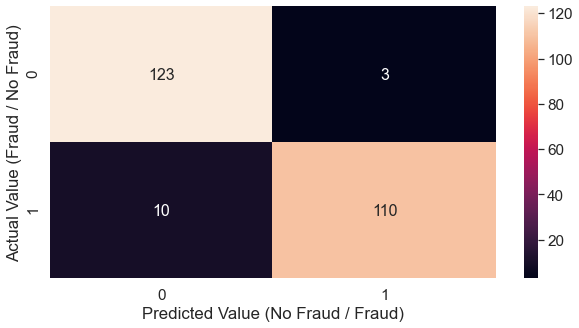

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm=confusion_matrix(y_test_categorical.argmax(axis=1),model.predict(X_test_scaled).argmax(axis=1))
df_cm = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize = (10,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True, fmt='g', annot_kws={"size": 16})# font size
plt.ylabel('Actual Value (Fraud / No Fraud)')
plt.xlabel('Predicted Value (No Fraud / Fraud)')

In [20]:
plt.savefig("NeuralConfusion.png")

<Figure size 432x288 with 0 Axes>

In [17]:
model.save("updatedmodel.h5")